<AxesSubplot:>

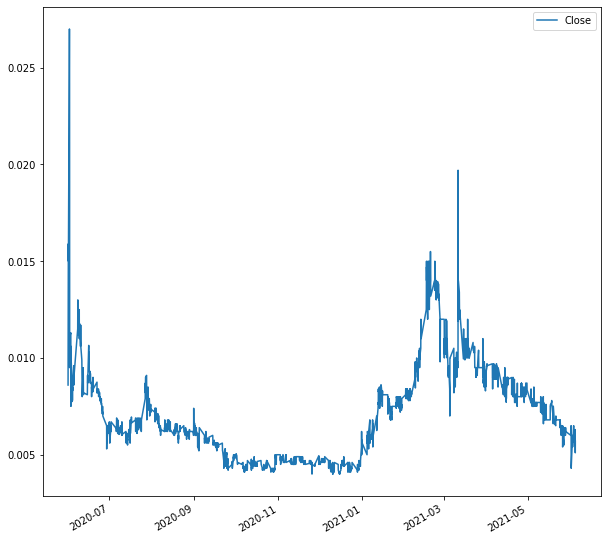

In [7]:
import yfinance as yf
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow.keras as keras
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline  
 
 
data=yf.download('AMAZ',start='2020-06-01', interval='1h',  end='2022-06-01',progress=False)[['Close']]

data.plot(figsize=(10,10))

In [8]:
data.head()

,Close
2020-06-01 09:30:00-04:00,0.00860
2020-06-01 10:30:00-04:00,0.01045
2020-06-01 11:30:00-04:00,0.01050
2020-06-01 12:30:00-04:00,0.01100
2020-06-01 13:30:00-04:00,0.01290


In [9]:
data.shape

(1627, 1)

In [10]:
type(data.values[0][0])

numpy.float64

In [11]:
cl = data.Close.astype('float32')
train = cl[0:int(len(cl)*0.80)]
scl = MinMaxScaler()
#Scale the data
scl.fit(train.values.reshape(-1,1))
cl =scl.transform(cl.values.reshape(-1,1))

#Create a function to process the data into lb observations look back slices
# and create the train test dataset (90-10)
def processData(data,lb):
    X,Y = [],[]
    for i in range(len(data)-lb-1):
        X.append(data[i:(i+lb),0])
        Y.append(data[(i+lb),0])
        #print(data[i:(i+lb)][9] == data[(i+lb)])
    return np.array(X),np.array(Y)
 
 
lb=10
X,y = processData(cl,lb)
X_train,X_test = X[:int(X.shape[0]*0.90)],X[int(X.shape[0]*0.90):]
y_train,y_test = y[:int(y.shape[0]*0.90)],y[int(y.shape[0]*0.90):]

In [12]:
#Build the model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(254,input_shape=(lb,1)))
model.add(tf.keras.layers.Dense(units=1))
model.compile(optimizer='adam',loss='mse')
 
#Reshape data for (Sample,Timestep,Features) 
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))
 
#Fit model with history to check for overfitting
history = model.fit(X_train,y_train,epochs=300,validation_data=(X_test,y_test),shuffle=False)
 
model.summary() 

[==============================] - 1s 21ms/step - loss: 7.4283e-04 - val_loss: 0.0015
Epoch 124/300
46/46 [==============================] - 1s 23ms/step - loss: 7.3582e-04 - val_loss: 0.0014
Epoch 125/300
46/46 [==============================] - 1s 21ms/step - loss: 7.1148e-04 - val_loss: 0.0014
Epoch 126/300
46/46 [==============================] - 1s 23ms/step - loss: 8.0381e-04 - val_loss: 0.0012
Epoch 127/300
46/46 [==============================] - 1s 21ms/step - loss: 8.4715e-04 - val_loss: 0.0013
Epoch 128/300
46/46 [==============================] - 1s 21ms/step - loss: 8.1524e-04 - val_loss: 0.0011
Epoch 129/300
46/46 [==============================] - 1s 20ms/step - loss: 6.8635e-04 - val_loss: 0.0010
Epoch 130/300
46/46 [==============================] - 1s 21ms/step - loss: 7.2677e-04 - val_loss: 9.2661e-04
Epoch 131/300
46/46 [==============================] - 1s 20ms/step - loss: 6.6520e-04 - val_loss: 8.5736e-04
Epoch 132/300
46/46 [==============================] - 1s 

Text(0.5, 1.0, 'Train Dataset')

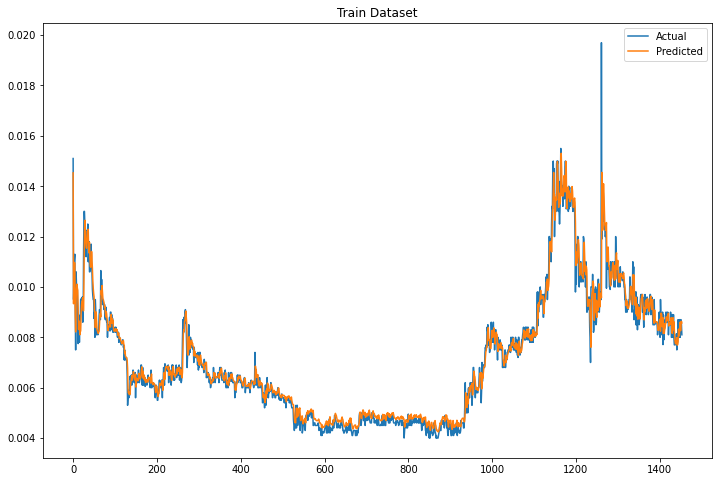

In [13]:
plt.figure(figsize=(12,8))

Xt = model.predict(X_train)
plt.plot(scl.inverse_transform(y_train.reshape(-1,1)), label="Actual")
plt.plot(scl.inverse_transform(Xt), label="Predicted")
plt.legend()
plt.title("Train Dataset")

Text(0.5, 1.0, 'Test Dataset')

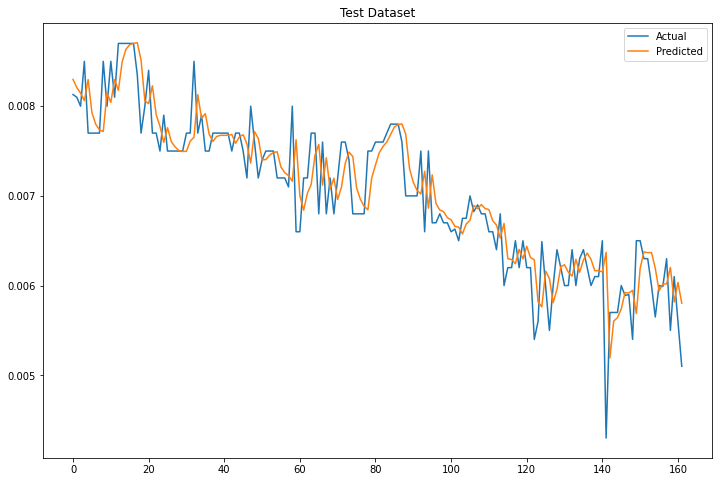

In [14]:
plt.figure(figsize=(12,8))

Xt = model.predict(X_test)
plt.plot(scl.inverse_transform(y_test.reshape(-1,1)), label="Actual")
plt.plot(scl.inverse_transform(Xt), label="Predicted")
plt.legend()
plt.title("Test Dataset")

In [15]:
model.save('./lstm_stock_prediction')

INFO:tensorflow:Assets written to: ./lstm_stock_prediction/assets
INFO:tensorflow:Assets written to: ./lstm_stock_prediction/assets
